In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plot

In [2]:
# Reading Data
data = pd.read_csv('private-residential-property-price-index-base-quarter-2009-q1-100.csv')
data.head()

,quarter,level_1,value
0,1975-Q1,Residential Properties,8.9
1,1975-Q2,Residential Properties,9.1
2,1975-Q3,Residential Properties,9.1
3,1975-Q4,Residential Properties,9.1
4,1976-Q1,Residential Properties,9.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
quarter    178 non-null object
level_1    178 non-null object
value      178 non-null float64
dtypes: float64(1), object(2)
memory usage: 4.2+ KB


In [4]:
quater = list(i for i in range(0,178))
data['quarter'] = quater
Y = data['value'].values
X = data['quarter'].values
m = len(X)

X = X.reshape((m, 1))

# 1. Linear Regression

In [5]:

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print("RMSE")
print(rmse)
print("R2 Score")
print(r2)

RMSE
16.602900364860847
R2 Score
0.8789862392567793


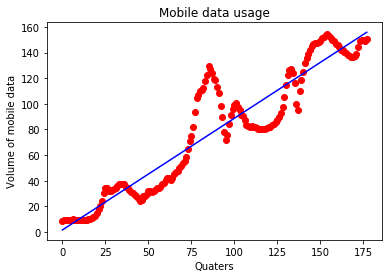

In [6]:
plot.scatter(X, Y, color = 'red')
plot.plot(X, reg.predict(X), color = 'blue')
plot.title('Mobile data usage')
plot.xlabel('Quaters')
plot.ylabel('Volume of mobile data')
plot.show()


# 2. Support Vector Regression

In [7]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(X, Y).predict(X)


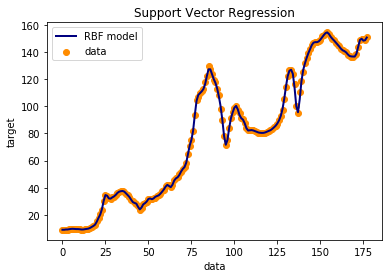

In [8]:
lw = 2
plot.scatter(X, Y, color='darkorange', label='data')
plot.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plot.xlabel('data')
plot.ylabel('target')
plot.title('Support Vector Regression')
plot.legend()
plot.show()


# 3. Decision Tree Regression


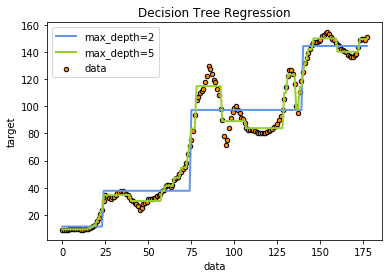

In [9]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, Y)
regr_2.fit(X, Y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, Y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()